<a href="https://colab.research.google.com/github/minhtrong20130448/ML/blob/main/Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Load dataset

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn import metrics

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
%cd '/content/gdrive/MyDrive/ProjectML'

Mounted at /content/gdrive
/content/gdrive/MyDrive/ProjectML


Load data

In [ ]:
data = pd.read_csv('mushroom.csv', delimiter=';')
data['stalk-root']

0         e
1         c
2         c
3         e
4         e
       ... 
8119    NaN
8120    NaN
8121    NaN
8122    NaN
8123    NaN
Name: stalk-root, Length: 8124, dtype: object

In [ ]:
data.isnull().sum()

classes                        0
cap-shape                      0
cap-surface                    0
cap-color                      0
bruises                        0
odor                           0
gill-attachment                0
gill-spacing                   0
gill-size                      0
gill-color                     0
stalk-shape                    0
stalk-root                  2480
stalk-surface-above-ring       0
stalk-surface-below-ring       0
stalk-color-above-ring         0
stalk-color-below-ring         0
veil-type                      0
veil-color                     0
ring-number                    0
ring-type                      0
spore-print-color              0
population                     0
habitat                        0
dtype: int64

# Preprocessing

* **Handle Missing**

In [ ]:
imputer = SimpleImputer(strategy='most_frequent')
data['stalk-root'] = imputer.fit_transform(data[['stalk-root']])

In [ ]:
data['stalk-root']

0       e
1       c
2       c
3       e
4       e
       ..
8119    b
8120    b
8121    b
8122    b
8123    b
Name: stalk-root, Length: 8124, dtype: object

In [ ]:
data.dropna(inplace=True)
data['stalk-root']

0       e
1       c
2       c
3       e
4       e
       ..
7986    b
8001    b
8038    b
8095    c
8114    c
Name: stalk-root, Length: 5644, dtype: object

* **Encoder**


In [ ]:
mappings = list()

encoder = LabelEncoder()

for column in range(len(data.columns)):
  data[data.columns[column]] = encoder.fit_transform(data[data.columns[column]])

print(data['stalk-root'])

0       2
1       1
2       1
3       2
4       2
       ..
7986    0
8001    0
8038    0
8095    1
8114    1
Name: stalk-root, Length: 5644, dtype: int64


In [ ]:
data['stalk-root']

0       2
1       1
2       1
3       2
4       2
       ..
7986    0
8001    0
8038    0
8095    1
8114    1
Name: stalk-root, Length: 5644, dtype: int64

* **Feature Scaling**

In [ ]:
X = data.drop('classes', axis=1);
y = data['classes']

In [ ]:
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns = X.columns)
print(X['stalk-root'])

0       1.528948
1       0.438829
2       0.438829
3       1.528948
4       1.528948
          ...   
5639   -0.651290
5640   -0.651290
5641   -0.651290
5642    0.438829
5643    0.438829
Name: stalk-root, Length: 5644, dtype: float64


 * **Split Dataset**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Training

In [ ]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
print(lr.score(X_test, y_test))
print(round(metrics.accuracy_score(y_test, y_pred), 4))
print(round(metrics.precision_score(y_test, y_pred), 4))
print(round(metrics.recall_score(y_test, y_pred), 4))
print(round(metrics.f1_score(y_test, y_pred), 4))

0.9849424269264836
0.9849
0.9881
0.9719
0.9799


In [ ]:
svm = SVC(C=1.0, kernel='rbf')
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)
print(svm.score(X_test, y_test))
print(round(metrics.accuracy_score(y_test, y_pred), 4))
print(round(metrics.precision_score(y_test, y_pred), 4))
print(round(metrics.recall_score(y_test, y_pred), 4))
print(round(metrics.f1_score(y_test, y_pred), 4))

1.0
1.0
1.0
1.0
1.0


In [ ]:
nn = MLPClassifier(hidden_layer_sizes=(128,128))
nn.fit(X_train, y_train)
print(nn.score(X_test, y_test))

1.0


<Axes: >

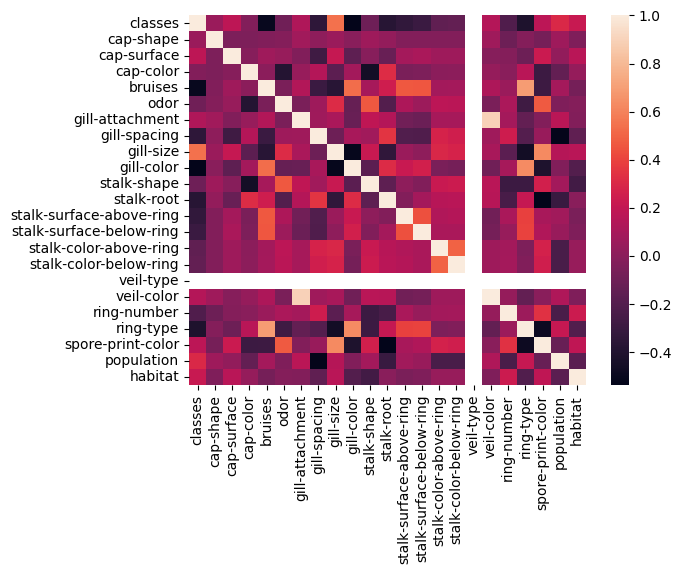

In [ ]:
corr = data.corr()
sns.heatmap(corr)